<h1 style="text-align: center; color: blue;"><u>Analyzing Customer Attrition in Our Bank's Credit Card Portfolio</u></h1>


## Context
Our bank has recently launched a range of premium credit card offerings, encompassing the Blue, Silver, Gold, and Platinum tiers. However, we have observed a notable uptick in customer attrition across these products in recent months. It is imperative for us to delve into the underlying factors driving this attrition, identify the customer segments most affected, and devise strategic measures to mitigate this trend effectively.

## Project Objective

1. **Analyze Customer Data:** Examine customer demographics and financial behavior to understand churn rates.

2. **Identify Churn Patterns:** Calculate churn rates and explore trends to pinpoint factors driving attrition.

3. **Evaluate Feature Importance:** Assess key factors contributing to customer churn for targeted intervention.

4. **Recommend Retention Strategies:** Provide actionable recommendations to improve customer retention based on data insights.

## Key Project Questions To be Answered

1. **Analyze Customer Data:**
   - What are the key demographic and financial attributes of customers in the dataset?
   - How do these attributes vary between attrited and existing customers?

2. **Identify Churn Patterns:**
   - What is the overall churn rate, and how has it changed over time?
   - Are there specific months or quarters with higher churn rates?
   - Are there demographic or financial patterns associated with higher churn rates?

3. **Evaluate Feature Importance:**
   - Which features (e.g., age, income, transaction history) are most influential in predicting customer churn?
   - How do these features contribute to the likelihood of attrition?

4. **Recommend Retention Strategies:**
   - Based on the analysis, what actionable strategies can be implemented to improve customer retention?
   - Are there specific interventions targeting identified churn factors?

## Dataset Description 

This analysis focuses on examining the data pertaining to customer attrition within our credit card portfolio fromn the last 12 months, known as "Bankchurners.csv" 

## Data Dictionary
`CLIENTNUM`: Client number. Unique identifier for the customer holding the account

`Attrition_Flag`: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

`Customer_Age`: Age in Years

`Gender`: Gender of the account holder

`Dependent_count`: Number of dependents.

`Education_Level`:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

`Marital_Status`: Marital Status of the account holder.

`Income_Category`: Annual Income Category of the account holder (USD).

`Card_Category`: Type of Card.

`Months_on_book`: Period of relationship with the bank (months).

`Total_Relationship_Count`: Total no. of products held by the customer.

`Months_Inactive_12_mon`: No. of months inactive in the last 12 months.

`Contacts_Count_12_mon`: No. of Contacts between the customer and bank in the last 12 months.

`Credit_Limit`: Credit Limit on the Credit Card (USD).

`Total_Revolving_Bal`: The balance that carries over from one month to the next is the revolving balance (USD).

`Avg_Open_To_Buy`: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months) (USD).

`Total_Trans_Amt`: Total Transaction Amount (Last 12 months) (USD).

`Total_Trans_Ct`: Total Transaction Count (Last 12 months).

`Total_Ct_Chng_Q4_Q1`: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter.

`Total_Amt_Chng_Q4_Q1`: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter.

`Avg_Utilization_Ratio`: Represents how much of the available credit the customer spent.

In [2]:
# Importing required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# To help me throughout my project I have created a project objective,
#key question and data dictionary as below: 
p_obj = {
    1: "Analyze Customer Data: Examine customer demographics and financial behavior to understand churn rates.",
    2: "Identify Churn Patterns: Calculate churn rates and explore trends to pinpoint factors driving attrition.",
    3: "Evaluate Feature Importance: Assess key factors contributing to customer churn for targeted intervention.",
    4: "Recommend Retention Strategies: Provide actionable recommendations to improve customer retention based on data insights."
}

p_quest = {
    1: "What are the key demographic and financial attributes of customers in the dataset?",
    2: "How do these attributes vary between attrited and existing customers?",
    3: "What is the overall churn rate, and how has it changed over time?",
    4: "Are there specific months or quarters with higher churn rates?",
    5: "Are there demographic or financial patterns associated with higher churn rates?",
    6: "Which features are most influential in predicting customer churn?",
    7: "How do these features contribute to the likelihood of attrition?",
    8: "Based on the analysis, what actionable strategies can be implemented to improve customer retention?",
    9: "Are there specific interventions targeting identified churn factors?"
}

p_dict = {
    'CLIENTNUM': 'Client number. Unique identifier for the customer holding the account',
    'Attrition_Flag': 'Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"',
    'Customer_Age': 'Age in Years',
    'Gender': 'Gender of the account holder',
    'Dependent_count': 'Number of dependents',
    'Education_Level': 'Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College (refers to a college student), Post-Graduate, Doctorate',
    'Marital_Status': 'Marital Status of the account holder',
    'Income_Category': 'Annual Income Category of the account holder (USD)',
    'Card_Category': 'Type of Card',
    'Months_on_book': 'Period of relationship with the bank (months)',
    'Total_Relationship_Count': 'Total no. of products held by the customer',
    'Months_Inactive_12_mon': 'No. of months inactive in the last 12 months',
    'Contacts_Count_12_mon': 'No. of Contacts between the customer and bank in the last 12 months',
    'Credit_Limit': 'Credit Limit on the Credit Card (USD)',
    'Total_Revolving_Bal': 'The balance that carries over from one month to the next is the revolving balance (USD)',
    'Avg_Open_To_Buy': 'Open to Buy refers to the amount left on the credit card to use (Average of last 12 months) (USD)',
    'Total_Trans_Amt': 'Total Transaction Amount (Last 12 months) (USD)',
    'Total_Trans_Ct': 'Total Transaction Count (Last 12 months)',
    'Total_Ct_Chng_Q4_Q1': 'Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter',
    'Total_Amt_Chng_Q4_Q1': 'Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter',
    'Avg_Utilization_Ratio': 'Represents how much of the available credit the customer spent'
}





<h2 style="text-align: center; color: black;">Loading Data</h2>

In [4]:
df = pd.read_csv("BankChurners_v2.csv")

In [5]:
 # let's create a copy of the data
data_churner = df.copy()

In [6]:
 # let's view the first 5 rows of the data
data_churner.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
 #let's check the number of columns and observation in the dataset
data_churner.shape   

(10127, 21)

### We have 21 columns and 10,127 oberservations 

In [8]:
 # let's check the data types of the columns in the dataset
data_churner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Our Data type consist of float64(7), int64(10) and  object(6)

In [9]:
 # let's check for duplicate values in the data
data_churner[data_churner.duplicated()]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [10]:
# let's check for missing values in the data
data_churner.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
#print uniques
data_churner.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

 The `Credit_Limit` attribute has a substantial number of unique values (6,205). This indicates a wide range of credit limits assigned to customers, reflecting diverse financial profiles. Understanding the factors influencing these variations could be essential for targeted customer management and credit strategy.

Metrics related to customer transactions, such as `Total_Trans_Amt` and `Total_Trans_Ct`, have a significant range of unique values (5,033 and 126, respectively). This suggests diverse transaction behaviors among customers. 



In [12]:
# let's view the statistical summary of the numerical columns in the data
data_churner.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


---------------------------------------------------------------------------------------------------------------------------

*`Customer Age Range`: The range of customer ages is from 26 to 73 years, with a mean age of approximately 46 years. 
This indicates a diverse age distribution among customers.

*`Credit Limit Variation`: The credit limit ranges from `1,438.30 to 34,516 USD`, with an average credit limit of approximately `8,631.95 USD`. The standard deviation of `9,088.78 USD` indicates significant variability in credit limits among customers.

Taking these into consideration it is undestanderable to have a high variation in the Transaction metrics:
`Total_Trans_Amt`	and `Total_Trans_Ct` exhibits considerable variation

Understanding the factors influencing these variations and their implications for customer behavior and risk management would be crucial for effective credit portfolio management and customer relationship strategies.

<a id="sum_non_num"></a>

In [13]:
# let's view the statistical summary of the non-numerical columns in the data
non_numeric = data_churner.describe(include=['object']).T
non_numeric['percentage'] = (non_numeric['freq']/non_numeric['count'])*100
non_numeric

,count,unique,top,freq,percentage
Attrition_Flag,10127,2,Existing Customer,8500,83.934038
Gender,10127,2,F,5358,52.908068
Education_Level,10127,7,Graduate,3128,30.887726
Marital_Status,10127,4,Married,4687,46.282216
Income_Category,10127,6,Less than $40K,3561,35.163425
Card_Category,10127,4,Blue,9436,93.176656


---------------------------------------------------------------------------------------------------------------------------
The dataset predominantly consists of `Existing Customers`, comprising approximately `84%` of the total customer base. 

`Gender distribution`, our customer base is fairly balanced, with women accounting for`53%`.

The majority of our customers hold a Graduate qualification which is appoximately `31%` 

`Marital status`, `46%` of our customers are `married`, while `35%` report an annual income of less than `40,000USD`.  

The majority of customers possess a `Blue Card`, representing approximately `93%` of the total card tier distribution.

<h2 style="text-align: center; color: black;">Cleaning Data</h2>

In [14]:
 # Moving CLIENTNUM column to index
data_churner.set_index('CLIENTNUM', inplace=True)

In [15]:
 # let's view the first 5 rows of the data with new index
data_churner.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
#Let's check the percentage of each unique category in each of the categorical variables.
for column in data_churner.select_dtypes(include="object").columns:
    category = (data_churner[column].value_counts(1)*100).round(2)
    print(category)
    print('_'*40)



Attrition_Flag
Existing Customer    83.93
Attrited Customer    16.07
Name: proportion, dtype: float64
________________________________________
Gender
F    52.91
M    47.09
Name: proportion, dtype: float64
________________________________________
Education_Level
Graduate         30.89
High School      19.88
Unknown          15.00
Uneducated       14.68
College          10.00
Post-Graduate     5.10
Doctorate         4.45
Name: proportion, dtype: float64
________________________________________
Marital_Status
Married     46.28
Single      38.94
Unknown      7.40
Divorced     7.39
Name: proportion, dtype: float64
________________________________________
Income_Category
Less than $40K    35.16
$40K - $60K       17.68
$80K - $120K      15.16
$60K - $80K       13.84
Unknown           10.98
$120K +            7.18
Name: proportion, dtype: float64
________________________________________
Card_Category
Blue        93.18
Silver       5.48
Gold         1.15
Platinum     0.20
Name: proportion, dtyp

---------------------------------------------------------------------------------------------------------------------------
###### We observed that `~7%` of entries in the `Marital_Status column` and  `~10%` of entries in the `Income_Category column` are labeled as `Unknown`

<h3 style = "text-align:center"> Investigating "Unknown"/Null observations </h3>

In [17]:
#Lets check the summary statistics of the non-numerical observation in the 'Unknown' Maritral Status
data_churner[data_churner['Marital_Status']=='Unknown'].describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,749,749,749,749,749,749
unique,2,2,7,1,6,4
top,Existing Customer,F,Graduate,Unknown,Less than $40K,Blue
freq,620,380,227,749,250,683


In [18]:
#Lets check the summary statistics of the non-numerical observation in the entire dataset
data_churner.describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Upon comparing the summary statistics of the dataset with 'Unknown' Marital Status to the overall dataset, there is a close resemblance  in the mode of the statistical summary of the entire dataset and the dataset with a marital status of "Unknown"

In [19]:
#Lets check the summary statistics of the numerical observation in the 'Unknown' Maritral Status
data_churner[data_churner['Marital_Status']=='Unknown'].describe(include=np.number)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.00000,749.000000,749.000000,749.000000
mean,45.568758,2.538051,35.189586,3.761015,2.323097,2.417891,9445.283178,1157.748999,8287.534179,0.749482,4720.00534,67.146862,0.715356,0.255899
std,6.863617,1.265632,7.211573,1.626248,1.039211,1.064874,9558.351504,825.692109,9585.015364,0.190963,3304.68602,22.531732,0.222735,0.267568
min,26.000000,0.000000,13.000000,1.000000,1.000000,0.000000,1438.300000,0.000000,111.000000,0.018000,647.00000,15.000000,0.077000,0.000000
25%,42.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2699.000000,0.000000,1438.300000,0.640000,2494.00000,49.000000,0.582000,0.000000
50%,45.000000,3.000000,36.000000,4.000000,2.000000,2.000000,5222.000000,1261.000000,3983.000000,0.734000,4182.00000,69.000000,0.707000,0.150000
75%,49.000000,3.000000,39.000000,5.000000,3.000000,3.000000,12778.000000,1793.000000,11350.000000,0.856000,4887.00000,82.000000,0.815000,0.470000
max,65.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.204000,16732.00000,131.000000,2.333000,0.958000


In [20]:
#Lets check the summary statistics of the numerical observation in the entire dataset
data_churner.describe(include=np.number)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



---------------------------------------------------------------------------------------------------------------------------
Upon comparing the summary statistics of the dataset with 'Unknown' Marital Status to the overall dataset the `Mean values` for various numerical features exhibit similarity between the two datasets.

Standard deviations (STD) also show a consistent pattern across both datasets, suggesting similar data spread.
Credit Limit Discrepancy:

While the STD values align, the credit limit STD remains notably high in both datasets.

`Further investigation` is warranted to understand the concentration of individuals with a `credit limit of 34,516 USD`, as it significantly influences the overall STD.


In [21]:
#Lets check the percentage of observation with a credit limit $34,516 in our entire dataset 
data_churner['Credit_Limit'].sort_values(ascending=True).value_counts(1)*100

Credit_Limit
34516.0    5.016293
1438.3     5.006418
9959.0     0.177743
15987.0    0.177743
23981.0    0.118495
             ...   
6247.0     0.009875
6248.0     0.009875
6249.0     0.009875
6256.0     0.009875
6511.0     0.009875
Name: proportion, Length: 6205, dtype: float64

In [22]:
#Lets check the percentage of observation with a credit limit $34,516 in the dataset with "Unknown" marital status 
data_churner[data_churner['Marital_Status']=='Unknown']['Credit_Limit'].sort_values(ascending=True).value_counts(1)*100

Credit_Limit
34516.0    5.340454
1438.3     4.939920
9959.0     0.400534
2222.0     0.400534
8109.0     0.267023
             ...   
3477.0     0.133511
3509.0     0.133511
3523.0     0.133511
3552.0     0.133511
5357.0     0.133511
Name: proportion, Length: 646, dtype: float64

In [23]:
#Lets check the statistical summary of the observation with a credit limit $34,516 in the entire dataset 
data_churner[data_churner['Credit_Limit']==34516.0].describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,508,508,508,508,508,508
unique,2,2,7,4,4,4
top,Existing Customer,M,Graduate,Single,$80K - $120K,Silver
freq,419,468,162,236,215,221


In [24]:
#Lets check the statistical summary of the observation with a credit limit $1,438.30 in the entire dataset 
data_churner[data_churner['Credit_Limit']==1438.3].describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,507,507,507,507,507,507
unique,2,2,7,4,6,1
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,383,404,149,251,315,507


In [25]:
#Lets check the percentage of observation with a credit limit $34,516 in the dataset with silver Card
data_churner[data_churner['Card_Category']=='Silver']['Credit_Limit'].sort_values(ascending=True).value_counts(1)*100

Credit_Limit
34516.0    39.81982
17894.0     0.36036
15578.0     0.36036
6224.0      0.36036
33889.0     0.18018
             ...   
13704.0     0.18018
13669.0     0.18018
13651.0     0.18018
13626.0     0.18018
16290.0     0.18018
Name: proportion, Length: 332, dtype: float64

---------------------------------------------------------------------------------------------------------------------------

After identifying that approximately `40%` of our `Silver Tier` cardholders possess a credit limit of `~34,000 USD`, a figure significantly higher than expected, I've made the strategic decision not to discard observations labeled as 'Unknown' within our dataset. 

Utilizing the 'Credit_Limit' variable, I plan to segment our customers into `distinct groups` based on their credit limits. 

To address the presence of 'Unknown' values within our dataset, I intend to `impute the mode of the 'Income_Category' and 'Marital_Status'` variables within each newly defined group. 

By replacing these 'Unknown' values with `mode values` tailored to each segment. 

In [26]:
#Utilizing the 'Credit_Limit' variable, I segment our customers into distinct groups based on their credit limits.

# Create a bin size for each segment 

bins_edge= [0,2001,5001,10001,20001,35000]

# Create a Label for each segment 

labels=['0-2000','2001-5000','5001-10000','10001-20000','20001-35000']

#Create a new Column Credit_Limit_Cat

data_churner['Credit_Limit_Cat'] = pd.cut(data_churner['Credit_Limit'], bins=bins_edge, labels=labels)

In [27]:
#Lets review our dataset with the new column(Credit_Limit_Cat) 
data_churner.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Cat
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,10001-20000
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,5001-10000
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2001-5000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2001-5000
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2001-5000


In [28]:
#Lets review the percentage of our dataset within each new label

data_churner['Credit_Limit_Cat'].value_counts(1)*100

Credit_Limit_Cat
2001-5000      38.955268
5001-10000     19.897304
10001-20000    14.713143
0-2000         13.962674
20001-35000    12.471611
Name: proportion, dtype: float64

In [29]:
#Lets review the statistical summary of all our new labels 
data_churner[data_churner['Credit_Limit_Cat'] == "0-2000"].describe(exclude=np.number)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit_Cat
count,1414,1414,1414,1414,1414,1414,1414
unique,2,2,7,4,6,1,1
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,0-2000
freq,1036,1117,419,654,867,1414,1414


In [30]:
data_churner[data_churner['Credit_Limit_Cat'] == "2001-5000"].describe(exclude=np.number)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit_Cat
count,3945,3945,3945,3945,3945,3945,3945
unique,2,2,7,4,6,3,1
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,2001-5000
freq,3397,2685,1223,1931,1964,3943,3945


In [31]:
data_churner[data_churner['Credit_Limit_Cat'] == "5001-10000"].describe(exclude=np.number)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit_Cat
count,2015,2015,2015,2015,2015,2015,2015
unique,2,2,7,4,6,3,1
top,Existing Customer,M,Graduate,Married,Less than $40K,Blue,5001-10000
freq,1713,1040,648,931,572,2011,2015


In [32]:
data_churner[data_churner['Credit_Limit_Cat'] == "10001-20000"].describe(exclude=np.number)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit_Cat
count,1490,1490,1490,1490,1490,1490,1490
unique,2,2,7,4,6,4,1
top,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,10001-20000
freq,1275,1051,466,671,390,1244,1490


In [33]:
data_churner[data_churner['Credit_Limit_Cat'] == "20001-35000"].describe(exclude=np.number)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit_Cat
count,1263,1263,1263,1263,1263,1263,1263
unique,2,2,7,4,5,4,1
top,Existing Customer,M,Graduate,Single,$80K - $120K,Blue,20001-35000
freq,1079,1121,372,538,520,824,1263


---------------------------------------------------------------------------------------------------------------------------
Using the statistical summary of our new Credit Limit Categories, focusing on Marital Status and Income Category,
I have identified distinct patterns. 

Customers within the credit limit ranges of `0-2000, 2001-5000, and 5001-10000` exhibit similar statistical profiles, predominantly married individuals with an income category of less than 40k USD.

In contrast, customers in the `10001-20000` range are predominantly married with an income category of `80k - 120k USD`. 

Lastly, customers with a credit limit of `20001-35000` are predominantly single with an income category of `80k - 120k USD`.

In [34]:
#Imputing the mode dedrived from the statistical summary 

#Create a for loop for the new creadit limit category 
for Credit_Limit_Cat in data_churner['Credit_Limit_Cat']:
    if Credit_Limit_Cat == "20001-35000":
        data_churner.loc[data_churner['Income_Category'] == "Unknown", 'Income_Category'] = "$80K - $120K"
        data_churner.loc[data_churner['Marital_Status'] == "Unknown", 'Marital_Status'] = "Single"
        data_churner.loc[data_churner['Education_Level'] == "Unknown", 'Education_Level'] = "Graduate"
    elif Credit_Limit_Cat == "10001-20000":
        data_churner.loc[data_churner['Income_Category'] == "Unknown", 'Income_Category'] = "$80K - $120K"
        data_churner.loc[data_churner['Marital_Status'] == "Unknown", 'Marital_Status'] = "Married"
        data_churner.loc[data_churner['Education_Level'] == "Unknown", 'Education_Level'] = "Graduate"
    elif Credit_Limit_Cat == "5001-10000":
        data_churner.loc[data_churner['Income_Category'] == "Unknown", 'Income_Category'] = "Less than $40K"
        data_churner.loc[data_churner['Marital_Status'] == "Unknown", 'Marital_Status'] = "Married"
        data_churner.loc[data_churner['Education_Level'] == "Unknown", 'Education_Level'] = "Graduate"
    elif Credit_Limit_Cat == "2001-5000":
        data_churner.loc[data_churner['Income_Category'] == "Unknown", 'Income_Category'] = "Less than $40K"
        data_churner.loc[data_churner['Marital_Status'] == "Unknown", 'Marital_Status'] = "Married"
        data_churner.loc[data_churner['Education_Level'] == "Unknown", 'Education_Level'] = "Graduate"
    else:
        data_churner.loc[data_churner['Income_Category'] == "Unknown", 'Income_Category'] = "Less than $40K"
        data_churner.loc[data_churner['Marital_Status'] == "Unknown", 'Marital_Status'] = "Married"
        data_churner.loc[data_churner['Education_Level'] == "Unknown", 'Education_Level'] = "Graduate"


In [35]:
#Let's review the percentage of each unique category in each of the categorical variables.
for column in data_churner.select_dtypes(include="object").columns:
    category = (data_churner[column].value_counts(1)*100).round(2)
    print(category)
    print('_'*40)



Attrition_Flag
Existing Customer    83.93
Attrited Customer    16.07
Name: proportion, dtype: float64
________________________________________
Gender
F    52.91
M    47.09
Name: proportion, dtype: float64
________________________________________
Education_Level
Graduate         45.89
High School      19.88
Uneducated       14.68
College          10.00
Post-Graduate     5.10
Doctorate         4.45
Name: proportion, dtype: float64
________________________________________
Marital_Status
Married     53.68
Single      38.94
Divorced     7.39
Name: proportion, dtype: float64
________________________________________
Income_Category
Less than $40K    35.16
$80K - $120K      26.14
$40K - $60K       17.68
$60K - $80K       13.84
$120K +            7.18
Name: proportion, dtype: float64
________________________________________
Card_Category
Blue        93.18
Silver       5.48
Gold         1.15
Platinum     0.20
Name: proportion, dtype: float64
________________________________________


<h3 style= "text-align:center;"> Visualizations of Dataset</h3>

In [36]:
corr_matrix = data_churner.corr(numeric_only=True)
corr_matrix

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


<Axes: >

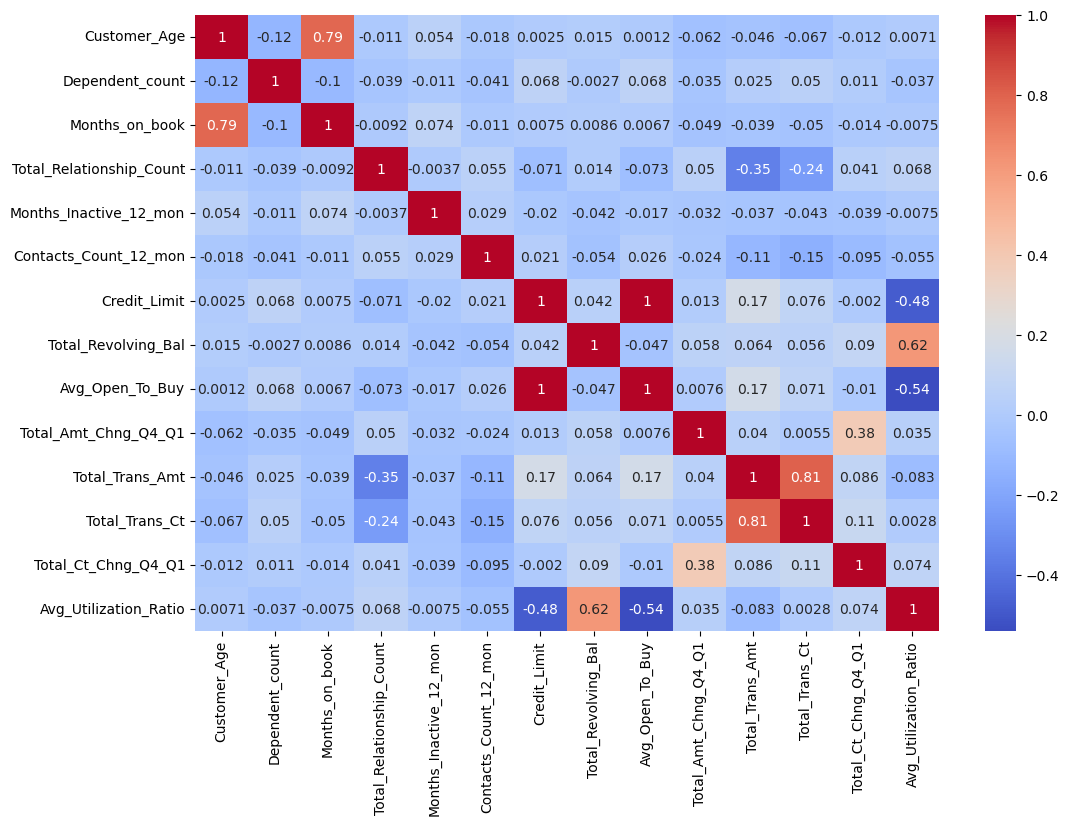

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

In [264]:
data_churner.select_dtypes(np.number).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [435]:
data_churner.to_csv('data_churner_EDA_unknown.csv', index=True)